In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime
import tensorflow_hub as hub
import pathlib
import random
from gc import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten


from helper import walk_through_dir
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [2]:
train_dir  = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [3]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size = IMG_SIZE,label_mode = "categorical",batch_size = BATCH_SIZE) 
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size = IMG_SIZE,label_mode = "categorical",batch_size = BATCH_SIZE) 

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [4]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [5]:
for images, labels in train_data.take(1):
    print(images,labels)

tf.Tensor(
[[[[9.50000000e+01 6.20000000e+01 4.50000000e+01]
   [9.50000000e+01 6.20000000e+01 4.50000000e+01]
   [9.60559616e+01 6.30559616e+01 4.60559616e+01]
   ...
   [6.69874907e+00 5.91301298e+00 4.34154081e+00]
   [4.00000000e+00 0.00000000e+00 0.00000000e+00]
   [5.00000000e+00 1.00000000e+00 0.00000000e+00]]

  [[9.50000000e+01 6.20000000e+01 4.50000000e+01]
   [9.57275238e+01 6.27275200e+01 4.57275200e+01]
   [9.62142868e+01 6.32142868e+01 4.62142868e+01]
   ...
   [7.47266579e+00 6.68692970e+00 5.11545753e+00]
   [4.00000000e+00 0.00000000e+00 0.00000000e+00]
   [5.00000000e+00 1.00000000e+00 0.00000000e+00]]

  [[9.50000000e+01 6.20000000e+01 4.50000000e+01]
   [9.60000000e+01 6.30000000e+01 4.60000000e+01]
   [9.70000000e+01 6.40000000e+01 4.70000000e+01]
   ...
   [7.85705566e+00 7.07131958e+00 5.49984741e+00]
   [4.00000000e+00 0.00000000e+00 0.00000000e+00]
   [4.69419622e+00 6.94196224e-01 0.00000000e+00]]

  ...

  [[1.64305786e+02 1.61305786e+02 1.28305786e+02]
   [1

In [6]:
from helper import create_tensorboard_callback

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3),name = "input layers")

x = base_model(inputs)
print(f"shape after passig inputs through base model {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layers")(x)
print(f"shape after  global average pooling {x.shape}")

outputs = tf.keras.layers.Dense(10,activation = "softmax",name = "output_layer")(x)


model0 = tf.keras.Model(inputs,outputs)
model0.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])
history0 = model0.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = test_data,validation_steps = int(0.25*len(test_data)),callbacks = [create_tensorboard_callback("transfer_learning","10_percent")])

shape after passig inputs through base model (None, 7, 7, 1280)
shape after  global average pooling (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent/20221015-205832
Epoch 1/5
24/24 [==============================] - 14s 301ms/step - loss: 1.9466 - accuracy: 0.4173 - val_loss: 1.3401 - val_accuracy: 0.6957
Epoch 2/5
24/24 [==============================] - 4s 173ms/step - loss: 1.1334 - accuracy: 0.7613 - val_loss: 0.8796 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - 5s 213ms/step - loss: 0.8279 - accuracy: 0.8200 - val_loss: 0.7066 - val_accuracy: 0.8191
Epoch 4/5
24/24 [==============================] - 5s 199ms/step - loss: 0.6542 - accuracy: 0.8560 - val_loss: 0.6185 - val_accuracy: 0.8388
Epoch 5/5
24/24 [==============================] - 5s 221ms/step - loss: 0.5596 - accuracy: 0.8880 - val_loss: 0.5537 - val_accuracy: 0.8553


In [7]:
for layer_number , layer in enumerate(base_model.layers):
    print(layer_number , layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [8]:
model0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 rs (GlobalAveragePooling2D)                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [9]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

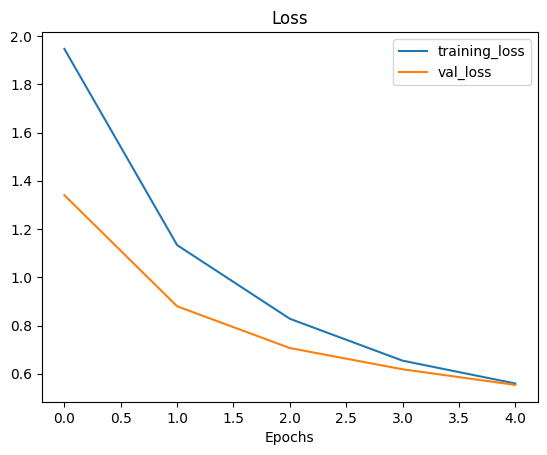

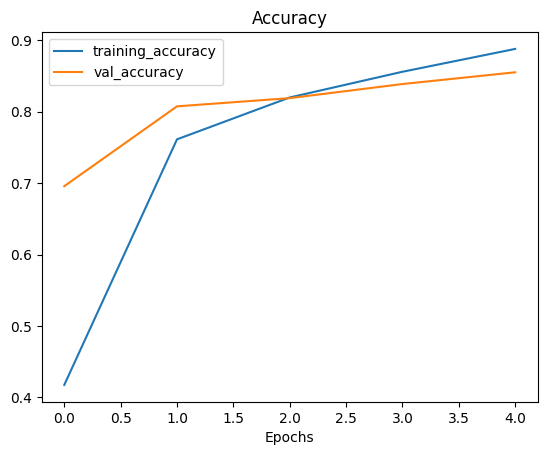

In [10]:
from helper import plot_loss_curves
plot_loss_curves(history0)

In [11]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
tensor = tf.random.normal(input_shape)
pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(tensor)
pooled_tensor, tensor

(<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
 array([[[[ 0.3274685 , -0.8426258 ,  0.3194337 ],
          [-1.4075519 , -2.3880599 , -1.0392479 ],
          [-0.5573232 ,  0.539707  ,  1.6994323 ],
          [ 0.28893656, -1.5066116 , -0.2645474 ]],
 
         [[-0.59722406, -1.9171132 , -0.62044144],
          [ 0.8504023 , -0.40604794, -3.0258412 ],
          [ 0.9058464 ,  0.29855987, -0.22561555],
          [-0.7616443 , -1.8917141 , -0.93847126]],
 
         [[ 0.77852213, -0.47338897,  0.97772694],
          [ 0.24694404,  0.20573747, -0.5256233 ],
          [ 0.32410017,  0.02545409, -0.10638497],
          [-0.6369475 ,  1.1603122 ,  0.2507359 ]],
 
         [[-0.41728503,  0.4012578 , -1.4145443 ],
          [-0.5931857 , -1.6617213 ,  0.33567193],
          [ 0.10815629,  0.23479682, -0.56668764],
          [-0.35819843,  0.88698614,  0.52744764]]]], dty

In [12]:
train_dir_1perc = "10_food_classes_1_percent/train"
test_dir_1perc = "10_food_classes_1_percent/test"

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1perc,batch_size= BATCH_SIZE,image_size = IMG_SIZE,label_mode = "categorical")
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1perc,batch_size= BATCH_SIZE,image_size = IMG_SIZE,label_mode = "categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
],name = "data_augmentation")

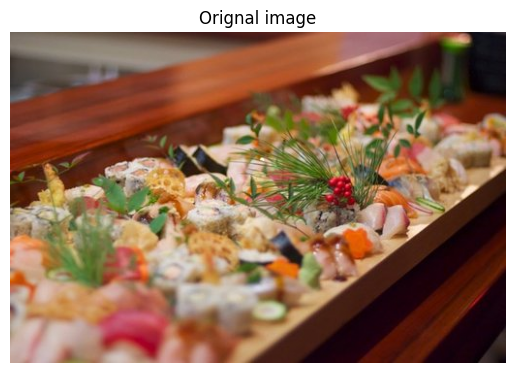

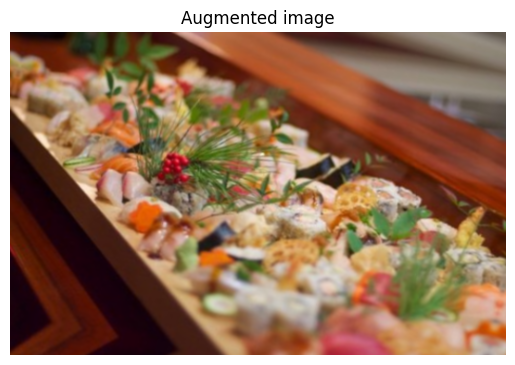

In [42]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_img = random.choice(os.listdir(target_dir))
random_img_path = target_dir + '/' + random_img
img = mimg.imread(random_img_path)
plt.axis(False)
plt.title("Orignal image")
plt.imshow(img/255.)

augmented_img = data_aug(img,training = True)
plt.figure()
plt.title("Augmented image")
plt.axis(False)
plt.imshow(augmented_img/255.)


In [47]:
img_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
input_layer = layers.Input(shape = img_shape,name = "input_layer")
x = data_aug(input_layer)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D(name = "Global_average_pooling_layer")(x)
output_layer = layers.Dense(10,activation = "softmax",name = "output_layer")(x)

model_1 = tf.keras.Model(input_layer,output_layer)
model_1.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])
history_01 = model_1.fit(train_data_1_percent,epochs = 5,steps_per_epoch = len(train_data_1_percent),validation_data = test_data_1_percent,validation_steps = int(0.25*len(test_data_1_percent)),callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",experiment_name="one_percent")])

Saving TensorBoard log files to: transfer_learning/one_percent/20221015-212927
Epoch 1/5
3/3 [==============================] - 7s 2s/step - loss: 2.4635 - accuracy: 0.1000 - val_loss: 2.3445 - val_accuracy: 0.1151
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.2319 - accuracy: 0.1714 - val_loss: 2.2092 - val_accuracy: 0.1711
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 2.0195 - accuracy: 0.3000 - val_loss: 2.0825 - val_accuracy: 0.2681
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 1.8102 - accuracy: 0.4857 - val_loss: 1.9793 - val_accuracy: 0.3438
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6966 - accuracy: 0.6000 - val_loss: 1.8745 - val_accuracy: 0.4095


In [41]:
input_layer.shape

TensorShape([None, 224, 224, 3])

In [43]:
augmented_img.shape

TensorShape([359, 551, 3])

In [49]:
model_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [50]:
results_01 = model_1.evaluate(test_data_1_percent)
results_01

79/79 [==============================] - 10s 123ms/step - loss: 1.8627 - accuracy: 0.4204


[1.8626693487167358, 0.4203999936580658]

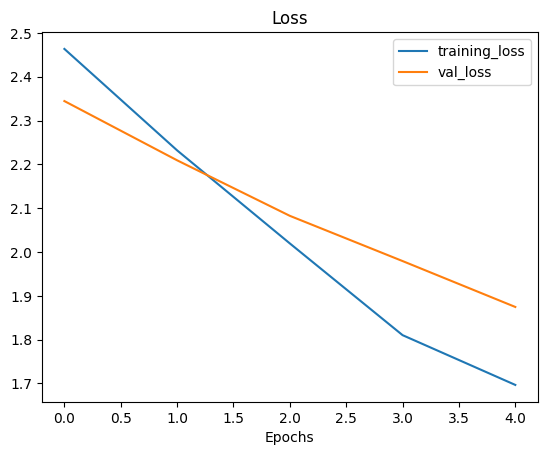

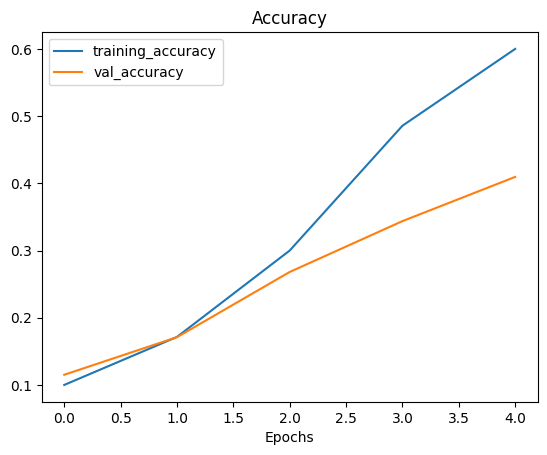

In [51]:
plot_loss_curves(history_01)